In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from roboticstoolbox.mobile import DubinsPlanner

In [3]:
TestSet = pd.read_csv("TestSet1.CSV",sep = ";", header = None)
TestSet.columns = ["x","y","r"]
TestSet

,x,y,r
0,10.5,14.4,0
1,18.0,15.9,10
2,18.3,13.3,10
3,16.5,9.3,10
4,15.4,11.0,10
5,14.9,13.2,5
6,16.3,13.3,5
7,16.4,17.8,5
8,15.0,17.9,5
9,16.1,19.6,10


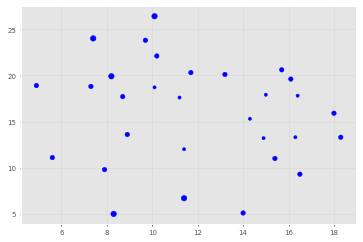

In [9]:
plot_rewards1 = plt.scatter(TestSet.x,TestSet.y, s = TestSet.r*2, c = "b")

In [12]:
start = TestSet.index[0]
end = TestSet.index[len(TestSet.index)-1]

[0, 31]

In [ ]:
# k,S_k , Σ, Θ

In [5]:
def getDubinLength(qi,qj,curvature,stepsize):
    dp = DubinsPlanner(curvature = curvature,stepsize = stepsize)
    path1 = dp.query(start = qi, goal = qj)
    length = path1[1].length
    return length

In [11]:
def getReachableLocations(T_max,S,theta_samples):
    """qi ∈ Sr ⇔ (Ld(q1,qi)+ Ld(qi,qn )) ≤ Tmax for any combination of sampled heading angles (θ1,θi,θn ). 
    This selects all target locations that are reachable by the Dubins vehicle within the travel budget"""
    ar = []
    n = S.index[len(S.index)-1]
    for i in S.index:
        if(i == S.index[0] | i == S.index[len(S.index)-1]):
            ar.append(i)
        else:
            reachable = True
            for theta1 in theta_samples:
                for thetai in theta_samples:
                    for thetan in theta_samples:
                        L_1 = getDubinLength(qi = [S.loc[0,"x"],S.loc[0,"y"],theta1],qj = [S.loc[i,"x"],S.loc[i,"y"],thetai])
                        L_2 = getDubinLength(qi = [S.loc[i,"x"],S.loc[i,"y"],thetai],qj = [S.loc[n,"x"],S.loc[n,"y"],thetan])
                        L = L_1 + L_2
                        if(L > T_max):
                            reachable = False
            if(reachable == True):
                ar.append(i)        
    ar.sort()
    S_r = S.loc[ar,:]
    return S_r

In [ ]:
def createInitialPath(S_r,T_max):
    """For an initial zero reward Dubins path from q1 to qn ,
     we iteratively add a new target location from Sr that minimizes
      additional distance per target reward as long as the length of the whole path is below Tmax ."""
    P = {"k": 0, "S_k": [], "Sigma": [], "Theta": []}
    S_k = []
    

In [ ]:
def variableNeighborhoodSearch(T_max,radius,S,m):
    theta_samples = [np.random.uniform(0, 2*np.pi) for mi in range(m)]
    S_r = getReachableLocations(T_max,S,theta_samples)
    P = createInitialPath(S_r,T_max)
    stoppingCriterion = False
    while(stoppingCriterion == False):
        l = 1
        P_1 = shake(P,l)
        P_2 = localSearch(P_1,l)
        if(length(P_2) <= T_max & getReward(P_2) >= getReward(P)):
            P = P_2
            l = 1
        else:
            l = l + 1
        stoppingCriterion = (l > 2)
    return P



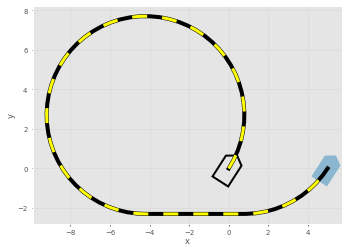

<AxesSubplot:xlabel='x', ylabel='y'>

In [2]:
dp = DubinsPlanner(curvature = 1/5,stepsize = 0.1)
path1 = dp.query(start = [0,0,1], goal = [5,0,1])
dp.plot(path1[0])

In [10]:
qi = [0,0,1]
qj = [5,0,1]
curvature = 1/5
stepsize = 0.1
getDubinLength(qi,qj,curvature,stepsize)

7.283185307179586